# 서울시 구별 cctv 현황 분석

#### (1) CCTV가 어느구에 많이 설치 되어있는가
#### (2) 서울시 각 구별 인구 현황
#### (3) 각 구별 인구 대비 CCTV 비율

#### 사용 툴 : Python, pandas, Matplotlib

In [2]:
import pandas as pd

## 1. CCTV 현황 데이터 읽기

In [3]:
# pandas 에서 cctv 현황 파일을 읽기
# 한글 데이터를 읽을 때는 인코딩 설정해야 함.
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv', encoding='utf-8')

In [4]:
## 데이터 확인
CCTV_Seoul.head()  # 첫 5개 행만 출력

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
# 각 열 데이터의 제목 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_Seoul.columns[0]

'기관명'

In [7]:
#implace 데이터를 직접 수정
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)

## 2. 인구현황 데이터 읽기

In [8]:
# 엑셀 파일을 읽을때 필요한 라이브러리 설치
# pip install xlrd 또는
# 아니콘다에서는
# conda install xlrd

In [9]:
# header - 열 제목을 사용할 헤더 지정
# usecols - 엑셀에서 사용할 컬럼을 지정
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls', 
                         header=2, 
                         usecols='B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


#### 변수 목록
#### CCTV_Seoul - 구별 CCTV 현황
#### pop_Seoul - 구별 인구 현황

## 3. Pandas 기초

In [11]:
import pandas as pd
import numpy as np

In [12]:
# pandas의 기초 데이터 유형 -> Series (1차원 행렬)
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
# 날짜를 Series로 만들기
dates = pd.date_range('20240327', periods=6)
dates

DatetimeIndex(['2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# dateFrame -> 2차원 행렬, 여러 개의 Series데이터 집합
# DataFrame (데이터 셋, index(행) 제목, column 제목
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = ['A', 'B', 'C', 'D'])
df
        

,A,B,C,D
2024-03-27,-3.100177,0.183015,-0.918702,-0.109295
2024-03-28,-0.255679,-0.348067,1.432802,-0.170000
2024-03-29,0.616680,0.552226,-0.193749,-0.142718
2024-03-30,-0.308588,0.830970,-1.241264,1.072172
2024-03-31,0.327223,0.487429,-1.308879,-1.156370
2024-04-01,0.243869,-0.778312,0.739288,-0.424191


In [15]:
df.index

DatetimeIndex(['2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-3.10017703,  0.18301519, -0.9187023 , -0.10929471],
       [-0.25567892, -0.34806664,  1.43280244, -0.16999994],
       [ 0.61667953,  0.55222643, -0.19374934, -0.14271793],
       [-0.30858806,  0.83097032, -1.24126355,  1.07217203],
       [ 0.32722334,  0.48742939, -1.30887883, -1.15637024],
       [ 0.24386929, -0.7783123 ,  0.73928828, -0.42419055]])

In [18]:
# 판다스에서 데이터프레임의 정보 얻어오기
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2024-03-27 to 2024-04-01
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [19]:
# 데이터프레임의 기초 통계 정보
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.412779,0.154544,-0.248417,-0.155067
std,1.363541,0.608303,1.128242,0.718835
min,-3.100177,-0.778312,-1.308879,-1.156370
25%,-0.295361,-0.215296,-1.160623,-0.360643
50%,-0.005905,0.335222,-0.556226,-0.156359
75%,0.306385,0.536027,0.506029,-0.117651
max,0.616680,0.830970,1.432802,1.072172


In [20]:
# 정렬
df.sort_values(by='A', ascending=False) # 내림차순으로 정렬

,A,B,C,D
2024-03-29,0.616680,0.552226,-0.193749,-0.142718
2024-03-31,0.327223,0.487429,-1.308879,-1.156370
2024-04-01,0.243869,-0.778312,0.739288,-0.424191
2024-03-28,-0.255679,-0.348067,1.432802,-0.170000
2024-03-30,-0.308588,0.830970,-1.241264,1.072172
2024-03-27,-3.100177,0.183015,-0.918702,-0.109295


In [21]:
df['A']

2024-03-27   -3.100177
2024-03-28   -0.255679
2024-03-29    0.616680
2024-03-30   -0.308588
2024-03-31    0.327223
2024-04-01    0.243869
Freq: D, Name: A, dtype: float64

In [22]:
df[1:2]

,A,B,C,D
2024-03-28,-0.255679,-0.348067,1.432802,-0.17


In [23]:
df

,A,B,C,D
2024-03-27,-3.100177,0.183015,-0.918702,-0.109295
2024-03-28,-0.255679,-0.348067,1.432802,-0.170000
2024-03-29,0.616680,0.552226,-0.193749,-0.142718
2024-03-30,-0.308588,0.830970,-1.241264,1.072172
2024-03-31,0.327223,0.487429,-1.308879,-1.156370
2024-04-01,0.243869,-0.778312,0.739288,-0.424191


In [24]:
df['2024-03-29':'2024-03-31']

,A,B,C,D
2024-03-29,0.616680,0.552226,-0.193749,-0.142718
2024-03-30,-0.308588,0.830970,-1.241264,1.072172
2024-03-31,0.327223,0.487429,-1.308879,-1.156370


In [25]:
# df.loc, df.iloc
df.loc['2024-03-28']

A   -0.255679
B   -0.348067
C    1.432802
D   -0.170000
Name: 2024-03-28 00:00:00, dtype: float64

In [26]:
df.loc['2024-03-29':'2024-03-31', ['A','B']]

,A,B
2024-03-29,0.616680,0.552226
2024-03-30,-0.308588,0.830970
2024-03-31,0.327223,0.487429


In [27]:
#iloc는 숫자 인덱스 사용하여 값 추출
df.iloc[0]

A   -3.100177
B    0.183015
C   -0.918702
D   -0.109295
Name: 2024-03-27 00:00:00, dtype: float64

In [28]:
df

,A,B,C,D
2024-03-27,-3.100177,0.183015,-0.918702,-0.109295
2024-03-28,-0.255679,-0.348067,1.432802,-0.170000
2024-03-29,0.616680,0.552226,-0.193749,-0.142718
2024-03-30,-0.308588,0.830970,-1.241264,1.072172
2024-03-31,0.327223,0.487429,-1.308879,-1.156370
2024-04-01,0.243869,-0.778312,0.739288,-0.424191


## 4. CCTV와 인구현황 데이터 파악

### (1) CCTV 데이터에서 소계로 정렬

In [29]:
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [30]:
CCTV_Seoul.sort_values(by ='소계',ascending = True)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204
1,강동구,773,379,99,155,377
3,강서구,884,388,258,184,81
19,영등포구,904,495,214,195,373


In [31]:
CCTV_Seoul.sort_values(by ='소계',ascending = False)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


In [32]:
CCTV_Seoul['최근증가율']=(CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+\
                     CCTV_Seoul['2014년'])/ CCTV_Seoul['2013년도 이전'] * 100

In [33]:
CCTV_Seoul.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [34]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 최근에 CCTV가 가장 많이 증가한 구는 '종로구', '도봉구', '마포구', 순

### (2) 인구현황

In [35]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [36]:
# 합계행을 지우기 (pop_Seoul 에 삭제를 반영하려면 inplace = True 사용)
pop_Seoul.drop([0], inplace=True)

In [37]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [38]:
# '구별' 컬럼에 대해 중복 데이터가 있는지 확인
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [39]:
pop_Seoul[pop_Seoul['구별'].isnull()] # 구별 컬럼이 null인 행 추출

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [40]:
pop_Seoul.drop([26], inplace=True)

In [41]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


#### 전체 인구대비 외국인, 고령자 비율 계산

In [43]:
pop_Seoul['외국인비율']=pop_Seoul['외국인']/pop_Seoul['인구수']*100
pop_Seoul['고령자비율']=pop_Seoul['고령자']/pop_Seoul['인구수']*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [44]:
# 인구수로 정렬
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### 서울시에서 인구가 많은 지역은 송파구, 강서구, 강남구, 노원구 순..

In [45]:
# 외국인 인구가 많은 구 
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [46]:
# 외국인 인구 비율이 많은 구
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [48]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [47]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 5. 두 데이터프레임 병합하기

In [49]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
		'B': ['B0', 'B1', 'B2', 'B3'],
		'C': ['C0', 'C1', 'C2', 'C3'],
		'D': ['D0', 'D1', 'D2', 'D3']},
		index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
		'B': ['B4', 'B5', 'B6', 'B7'],
		'C': ['C4', 'C5', 'C6', 'C7'],
		'D': ['D4', 'D5', 'D6', 'D7']},
		index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
		'B': ['B8', 'B9', 'B10', 'B11'],
		'C': ['C8', 'C9', 'C10', 'C11'],
		'D': ['D8', 'D9', 'D10', 'D11']},
		index=[8, 9, 10, 11])

In [50]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [51]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### (1) 데이터를 열방향으로 합치기 : concat

In [53]:
result = pd.concat([df1,df2,df3]) # 기본축 axis=0

In [54]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### (2) 각 데이터프레임을 키값을 부여하여 합치기

In [55]:
result = pd.concat([df1,df2,df3],keys=['x','y','z'])

In [56]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [57]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [58]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [59]:
result.index.get_level_values(1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [61]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
            		'D': ['D2', 'D3', 'D6', 'D7'],
            		'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])

In [62]:
# 각 데이터프레임을 횡으로 합치기
result = pd.concat([df1, df4], axis =1)

In [63]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [64]:
# 공통된 인덱스를 가지는 데이터 합치기
result = pd.concat([df1, df4], axis =1, join='inner')

In [65]:
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [68]:
# df1을 기준으로 합치기
result = pd.concat([df1, df4], axis=1).reindex(df1.index)

In [69]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### (3) marge 명령어로 합치기

In [70]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                	   'A': ['A0', 'A1', 'A2', 'A3'],
                	   'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
		                'C': ['C0', 'C1', 'C2', 'C3'],
		                'D': ['D0', 'D1', 'D2', 'D3']})

In [71]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [72]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [73]:
# merge 명령을 이용한 합치기.
# ON 옵션은 공통된 키를 합쳐짐.
pd.merge(left, right, on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [74]:
# 기준이 되는 데이터프레임을 설정하여 합치기
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [75]:
# 기준이 되는 데이터프레임을 설정하여 합치기
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [76]:
# 2개의 데이터프레임 데이터를 모두 합치기 (합집합)
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [77]:
# 2개의 데이터프레임 데이터를 공통된 요소로 합치기 (교집합)
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## 6. CCTV 데이터와 인구현황 데이터 합치고 분석하기

In [79]:
# merge명령을 사용하여 CCTV 현황과 인구 현황합치기 : 공통컬럼-'구별'
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [81]:
# 필요없는 컬럼 지우기
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [82]:
# 인덱스를 '구별' 컬럼으로 설정
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 서로 관련있는 데이터를 비교 -> 상관관계 게수 사용
# 0.1이하 -> 무시할 수준, 0.3이하 -> 약한 상관관계, 0.7이하 -> 뚜렷한 관계
# 상관관계 계수를 알아보는 방법: numpy의 corrcoef

In [83]:
import numpy as np

In [84]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

#### '고령자비율'과 '소계(cctv수)'sms -0.28로 약한 상관관계임

In [85]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [86]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [87]:
#CCTV와 인구수의 관계
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [88]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 7. 파이썬 시각화 도구 - Matplotlib

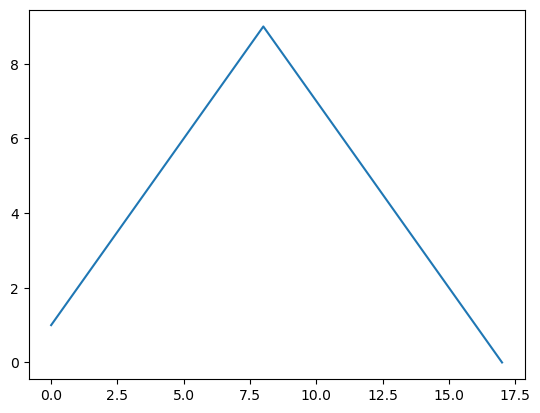

In [96]:
import matplotlib.pyplot as plt
# 그래프 결과를 셀에 나타나게 하는 옵션
%matplotlib inline 
plt.figure()  # figure 객체 생성

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

plt.show()

In [97]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

In [98]:
y

array([ 0.        ,  0.00999983,  0.01999867, ..., -0.5616433 ,
       -0.55334156, -0.54498449])

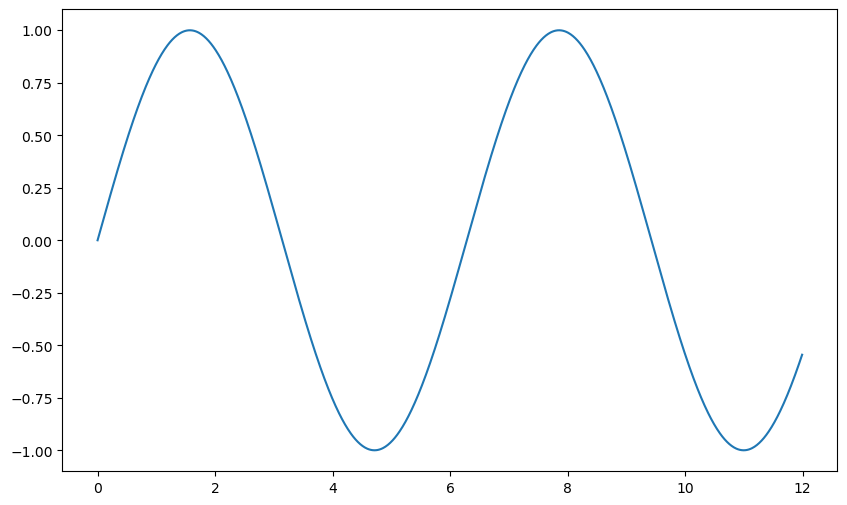

In [101]:
plt.figure(figsize=(10, 6))  # 인치 단위
plt.plot(t, y)
plt.show()

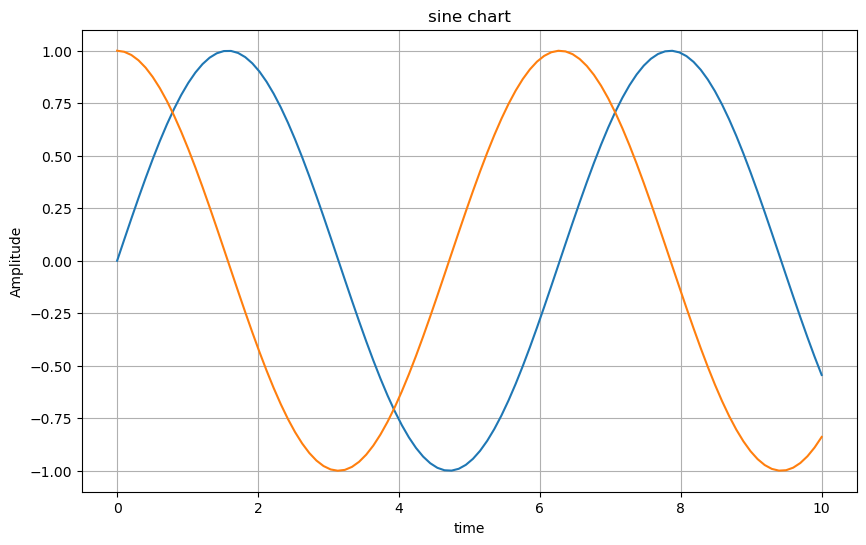

In [111]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))

plt.grid() # 격자 무늬

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('sine chart')
plt.show()

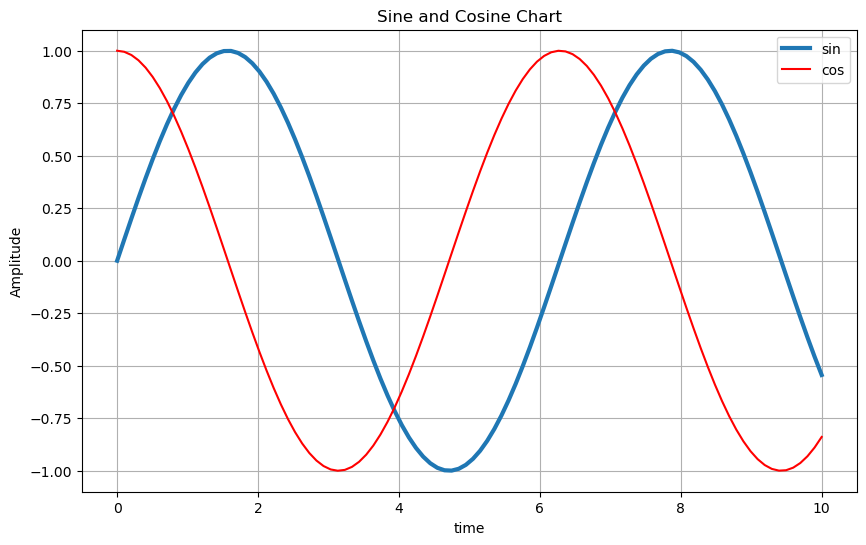

In [117]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 10, 100)  # 예시로 0부터 10까지 범위에서 100개의 점을 생성합니다.

plt.figure(figsize=(10,6))  # figure 크기 지정

plt.plot(t, np.sin(t), lw=3,label='sin')  # sin 함수 그래프
plt.plot(t, np.cos(t), 'r', label='cos', )  # cos 함수 그래프

plt.grid()  # 그리드 표시
plt.legend()  # 범례 표시
plt.xlabel('time')  # x축 레이블
plt.ylabel('Amplitude')  # y축 레이블
plt.title('Sine and Cosine Chart')  # 그래프 제목

plt.show()  # 그래프 출력

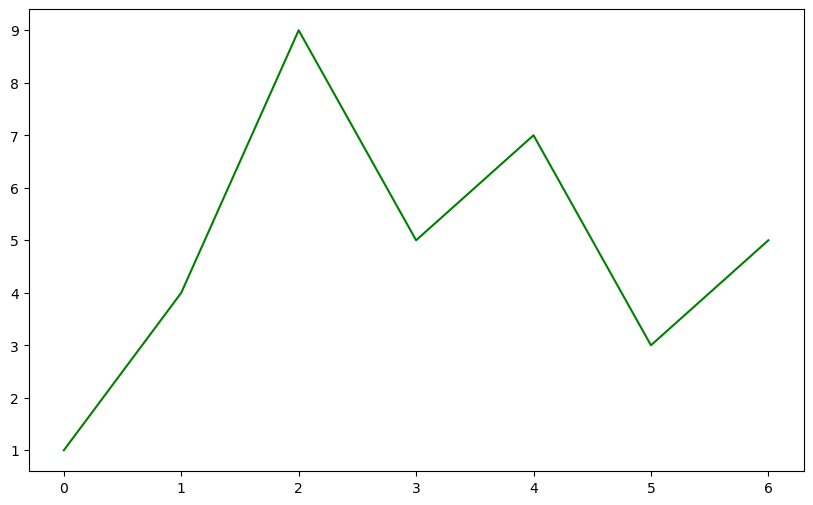

In [119]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 5, 7, 3, 5]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green') 
plt.show()

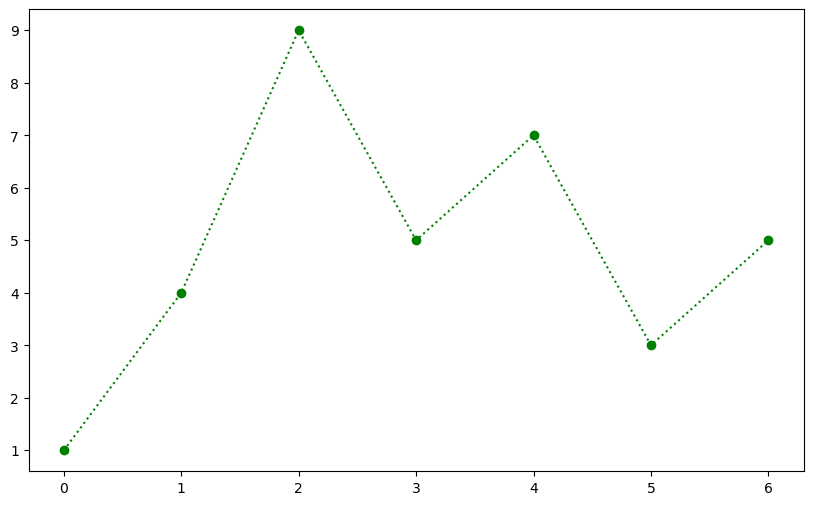

In [123]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 5, 7, 3, 5]
plt.figure(figsize=(10,6))
# 선종류: solid, dashed, dashdot, dotted
plt.plot(t, y, color='green', linestyle = 'dotted', marker='o') 
plt.show()

# 산점도 그래프(Scatter)

In [124]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 8, 5, 4, 6, 3, 1, 4])

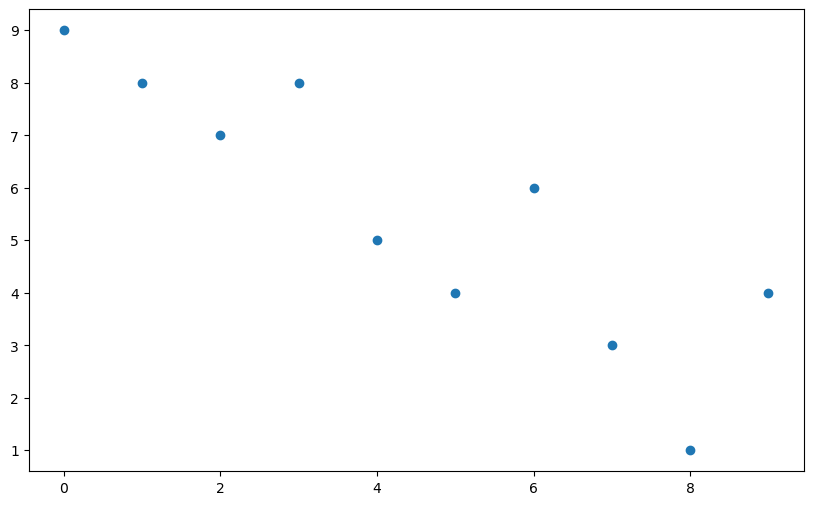

In [125]:
plt.figure(figsize=(10,6))
plt.scatter(t, y)
plt.show()

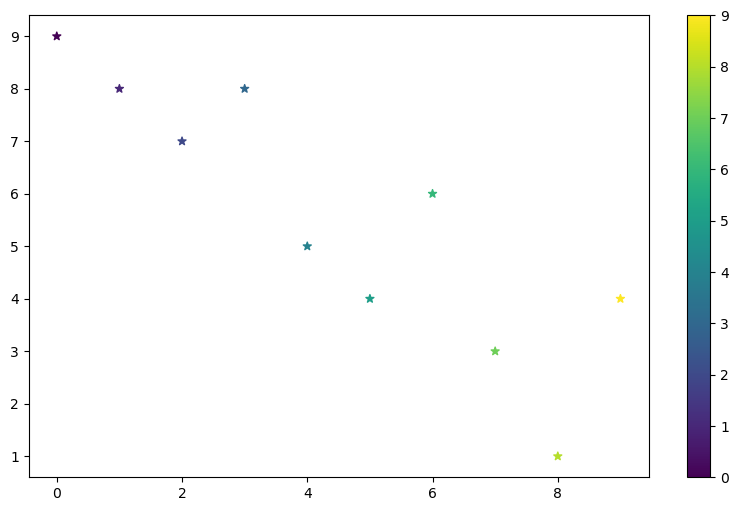

In [136]:
colormap = t
plt.figure(figsize=(10,6))
plt.scatter(t, y, marker='*', c=colormap)
plt.colorbar()
plt.show()

In [142]:
# numpy의 랜덤함수를 이용하여 3개의 데이터 생성
s1 = np.random.normal(loc = 0, scale = 1, size = 1000) #loc: 평균, scale : 표준편차
s2 = np.random.normal(loc = 5, scale = 0.5, size = 1000)
s3 = np.random.normal(loc = 10, scale = 2, size = 1000)

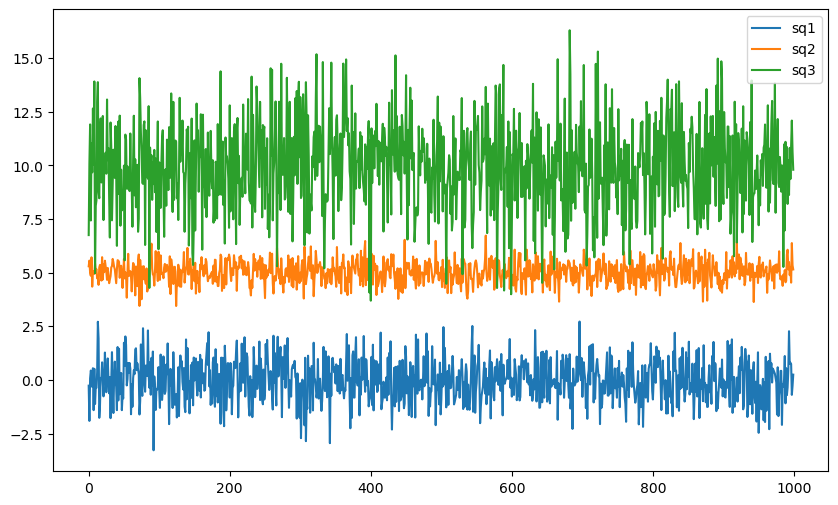

In [144]:
plt.figure(figsize=(10,6))
plt.plot(s1, label = 'sq1')
plt.plot(s2, label = 'sq2')
plt.plot(s3, label = 'sq3')
plt.legend()
plt.show()

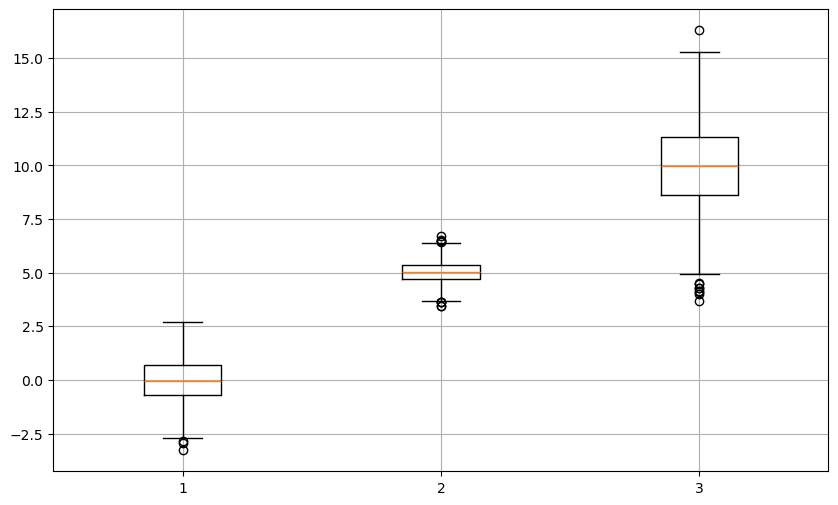

In [145]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

In [147]:
# 차트에 한글 사용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... Sorry~~~')

In [148]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


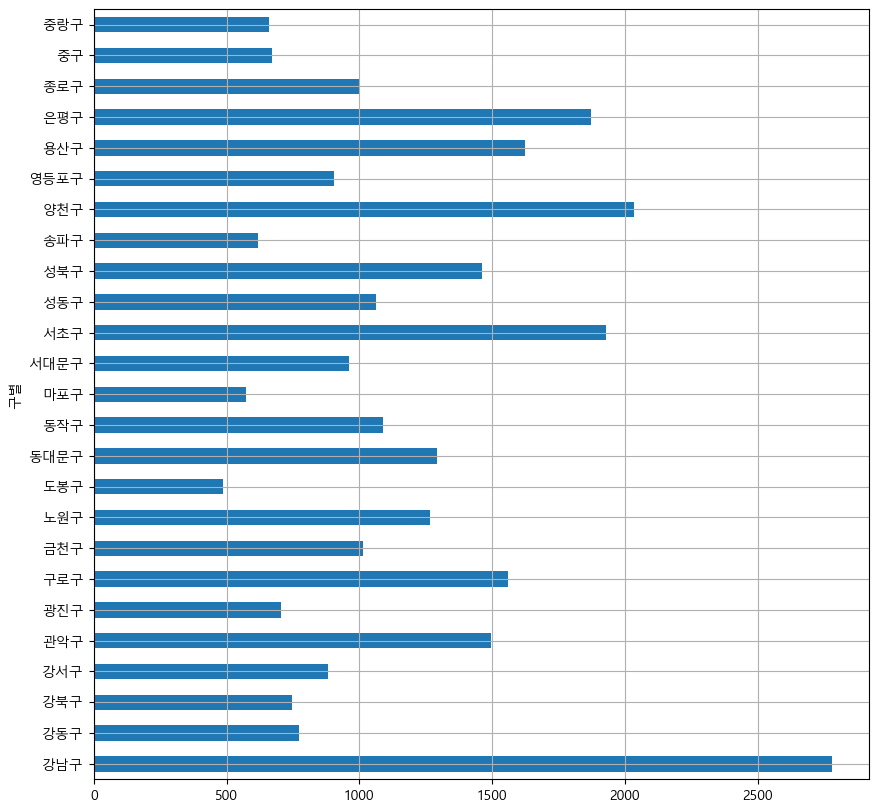

In [149]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(10,10))
plt.show()